# GATK

Genome Analysis Toolkit (GATK)

- Toolkit offers a wide variety of tools with a primary focus on variant discovery and genotyping. 

Dependency: JAVA, Python, R

In [22]:
# Install Java
!sudo apt-get -qq update
!sudo apt install -qq default-jdk
!sudo apt install -qq default-jre

In [2]:
!java -version

openjdk version "11.0.17" 2022-10-18
OpenJDK Runtime Environment (build 11.0.17+8-post-Ubuntu-1ubuntu220.04)
OpenJDK 64-Bit Server VM (build 11.0.17+8-post-Ubuntu-1ubuntu220.04, mixed mode, sharing)


In [21]:
# Install Bioconda

! wget -O miniconda.sh https://repo.anaconda.com/miniconda/Miniconda3-py37_4.10.3-Linux-x86_64.sh
! chmod +x miniconda.sh
! bash ./miniconda.sh -b -f -p /usr/local
! rm miniconda.sh
! conda config --add channels conda-forge
! conda config --add channels bioconda
! conda install -y mamba
! mamba update -qy --all
! mamba clean -qafy
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [4]:
!conda --version
!conda config --show channels

conda 22.9.0
channels:
  - bioconda
  - conda-forge
  - defaults


In [47]:
!conda install -y -c bioconda samtools fastqc bwa gatk4 picard

In [46]:
!gatk --version

Using GATK jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar --version
The Genome Analysis Toolkit (GATK) v4.3.0.0
HTSJDK Version: 3.0.1
Picard Version: 2.27.5


In [107]:
!sudo apt install -qq tree

tree is already the newest version (1.8.0-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


## GATK best practise

### download data

In [6]:
!wget ftp://ftp-trace.ncbi.nih.gov/1000genomes/ftp/phase3/data/HG00096/sequence_read/SRR062634_1.filt.fastq.gz

--2023-02-07 04:16:45--  ftp://ftp-trace.ncbi.nih.gov/1000genomes/ftp/phase3/data/HG00096/sequence_read/SRR062634_1.filt.fastq.gz
           => ‘SRR062634_1.filt.fastq.gz’
Resolving ftp-trace.ncbi.nih.gov (ftp-trace.ncbi.nih.gov)... 165.112.9.228, 165.112.9.229, 2607:f220:41e:250::13, ...
Connecting to ftp-trace.ncbi.nih.gov (ftp-trace.ncbi.nih.gov)|165.112.9.228|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /1000genomes/ftp/phase3/data/HG00096/sequence_read ... done.
==> SIZE SRR062634_1.filt.fastq.gz ... 1938959399
==> PASV ... done.    ==> RETR SRR062634_1.filt.fastq.gz ... done.
Length: 1938959399 (1.8G) (unauthoritative)

SRR062634_1.filt.fa 100%[===================>]   1.81G  16.0MB/s    in 1m 58s  

2023-02-07 04:18:46 (15.7 MB/s) - ‘SRR062634_1.filt.fastq.gz’ saved [1938959399]



In [7]:
!wget ftp://ftp-trace.ncbi.nih.gov/1000genomes/ftp/phase3/data/HG00096/sequence_read/SRR062634_2.filt.fastq.gz

--2023-02-07 04:18:46--  ftp://ftp-trace.ncbi.nih.gov/1000genomes/ftp/phase3/data/HG00096/sequence_read/SRR062634_2.filt.fastq.gz
           => ‘SRR062634_2.filt.fastq.gz’
Resolving ftp-trace.ncbi.nih.gov (ftp-trace.ncbi.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::10, ...
Connecting to ftp-trace.ncbi.nih.gov (ftp-trace.ncbi.nih.gov)|130.14.250.12|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /1000genomes/ftp/phase3/data/HG00096/sequence_read ... done.
==> SIZE SRR062634_2.filt.fastq.gz ... 1921928972
==> PASV ... done.    ==> RETR SRR062634_2.filt.fastq.gz ... done.
Length: 1921928972 (1.8G) (unauthoritative)

SRR062634_2.filt.fa 100%[===================>]   1.79G  16.3MB/s    in 1m 56s  

2023-02-07 04:20:44 (15.8 MB/s) - ‘SRR062634_2.filt.fastq.gz’ saved [1921928972]



In [52]:
!mkdir reads
!mv SRR062634_1.filt.fastq.gz reads/SRR062634_1.filt.fastq.gz
!mv SRR062634_2.filt.fastq.gz reads/SRR062634_2.filt.fastq.gz

### download reference files

In [8]:
!wget https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
!gunzip hg38.fa.gz

--2023-02-07 04:20:45--  https://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 983659424 (938M) [application/x-gzip]
Saving to: ‘hg38.fa.gz’

hg38.fa.gz          100%[===================>] 938.09M  19.1MB/s    in 49s     

2023-02-07 04:21:34 (19.2 MB/s) - ‘hg38.fa.gz’ saved [983659424/983659424]

mv: cannot stat 'hg38.fa.gz': No such file or directory


In [11]:
!mkdir ref
!mv hg38.fa ref/hg38.fa

mkdir: cannot create directory ‘ref’: File exists


### index ref


In [23]:
!samtools faidx ref/hg38.fa

In [24]:
!ls ref

hg38.fa  hg38.fa.fai


### ref dict

In [48]:
!gatk CreateSequenceDictionary R=ref/hg38.fa O=ref/hg38.dict

Using GATK jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar CreateSequenceDictionary R=ref/hg38.fa O=ref/hg38.dict
INFO	2023-02-07 06:18:26	CreateSequenceDictionary	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** 
https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    CreateSequenceDictionary -R ref/hg38.fa -O ref/hg38.dict
**********


06:18:26.201 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/l

In [49]:
!ls ref

hg38.dict  hg38.fa  hg38.fa.fai


### STEP 1: QC - Run fastqc 

In [58]:
!fastqc reads/SRR062634_1.filt.fastq.gz 
!fastqc reads/SRR062634_2.filt.fastq.gz 

In [67]:
!mkdir qc

In [78]:
!unzip reads/SRR062634_1.filt_fastqc.zip -d qc/
!unzip reads/SRR062634_2.filt_fastqc.zip -d qc/

Archive:  reads/SRR062634_1.filt_fastqc.zip
   creating: qc/SRR062634_1.filt_fastqc/
   creating: qc/SRR062634_1.filt_fastqc/Icons/
   creating: qc/SRR062634_1.filt_fastqc/Images/
  inflating: qc/SRR062634_1.filt_fastqc/Icons/fastqc_icon.png  
  inflating: qc/SRR062634_1.filt_fastqc/Icons/warning.png  
  inflating: qc/SRR062634_1.filt_fastqc/Icons/error.png  
  inflating: qc/SRR062634_1.filt_fastqc/Icons/tick.png  
  inflating: qc/SRR062634_1.filt_fastqc/summary.txt  
  inflating: qc/SRR062634_1.filt_fastqc/Images/per_base_quality.png  
  inflating: qc/SRR062634_1.filt_fastqc/Images/per_tile_quality.png  
  inflating: qc/SRR062634_1.filt_fastqc/Images/per_sequence_quality.png  
  inflating: qc/SRR062634_1.filt_fastqc/Images/per_base_sequence_content.png  
  inflating: qc/SRR062634_1.filt_fastqc/Images/per_sequence_gc_content.png  
  inflating: qc/SRR062634_1.filt_fastqc/Images/per_base_n_content.png  
  inflating: qc/SRR062634_1.filt_fastqc/Images/sequence_length_distribution.png  
  i

In [82]:
!cat qc/SRR062634_1.filt_fastqc/summary.txt

PASS	Basic Statistics	SRR062634_1.filt.fastq.gz
PASS	Per base sequence quality	SRR062634_1.filt.fastq.gz
FAIL	Per tile sequence quality	SRR062634_1.filt.fastq.gz
PASS	Per sequence quality scores	SRR062634_1.filt.fastq.gz
PASS	Per base sequence content	SRR062634_1.filt.fastq.gz
WARN	Per sequence GC content	SRR062634_1.filt.fastq.gz
PASS	Per base N content	SRR062634_1.filt.fastq.gz
PASS	Sequence Length Distribution	SRR062634_1.filt.fastq.gz
PASS	Sequence Duplication Levels	SRR062634_1.filt.fastq.gz
PASS	Overrepresented sequences	SRR062634_1.filt.fastq.gz
PASS	Adapter Content	SRR062634_1.filt.fastq.gz


qc/SRR062634_1.filt_fastqc/Images/sequence_length_distribution.png


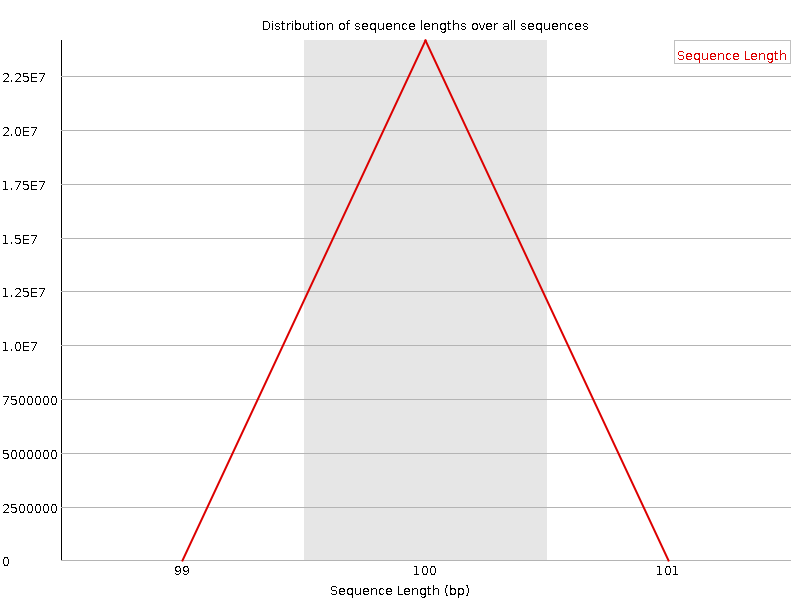

qc/SRR062634_1.filt_fastqc/Images/per_tile_quality.png


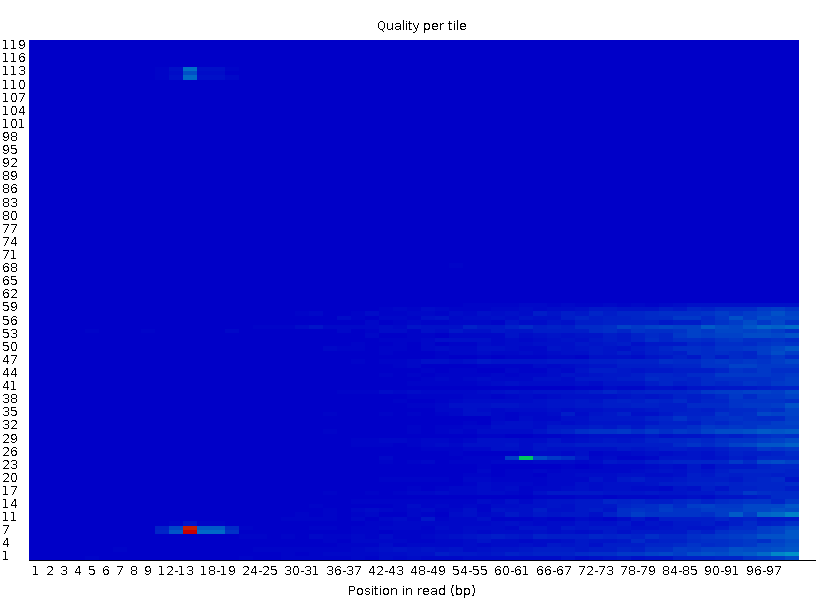

qc/SRR062634_1.filt_fastqc/Images/per_base_n_content.png


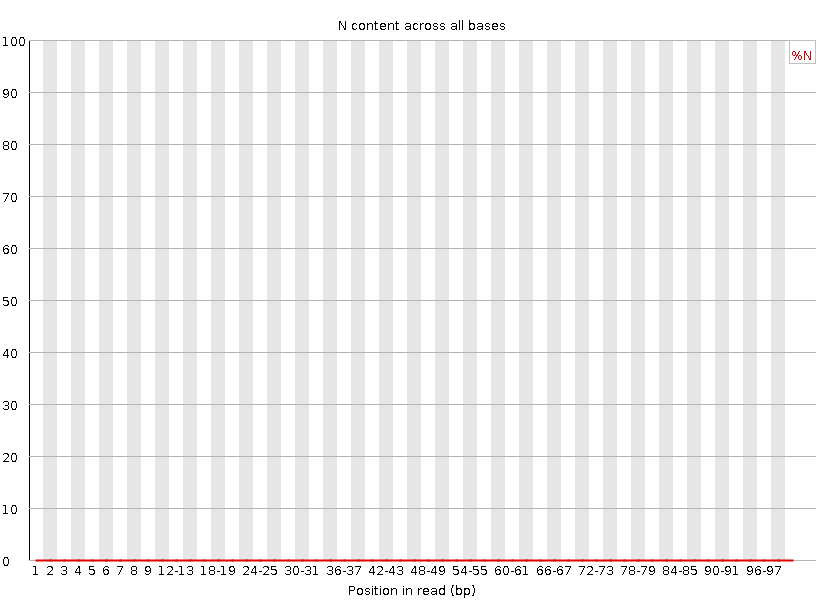

qc/SRR062634_1.filt_fastqc/Images/duplication_levels.png


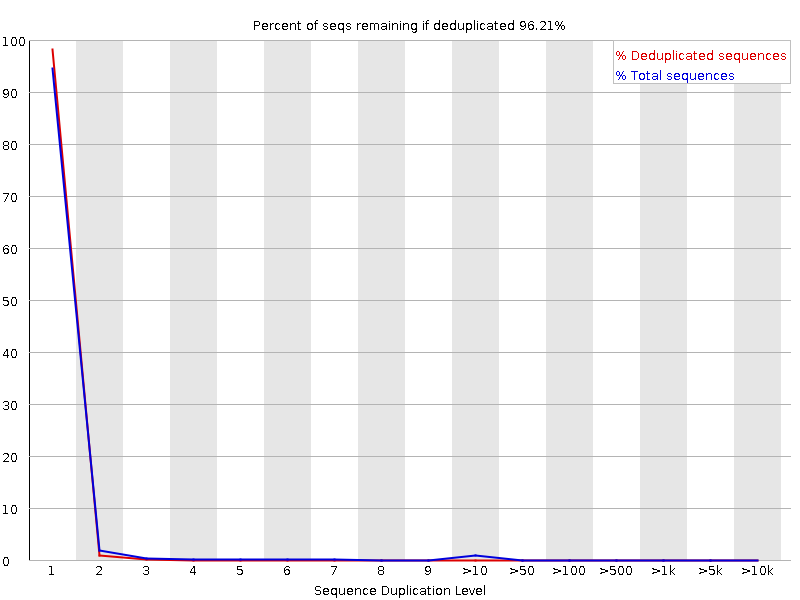

qc/SRR062634_1.filt_fastqc/Images/adapter_content.png


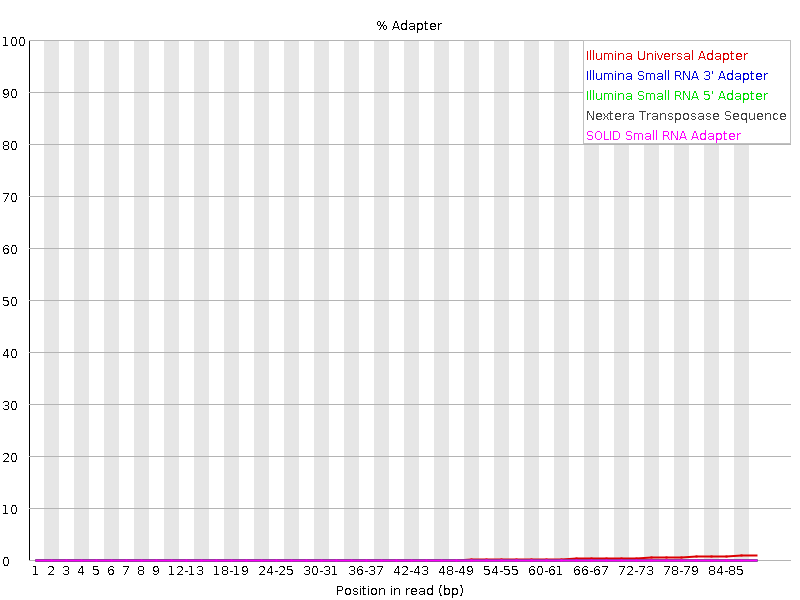

qc/SRR062634_1.filt_fastqc/Images/per_sequence_gc_content.png


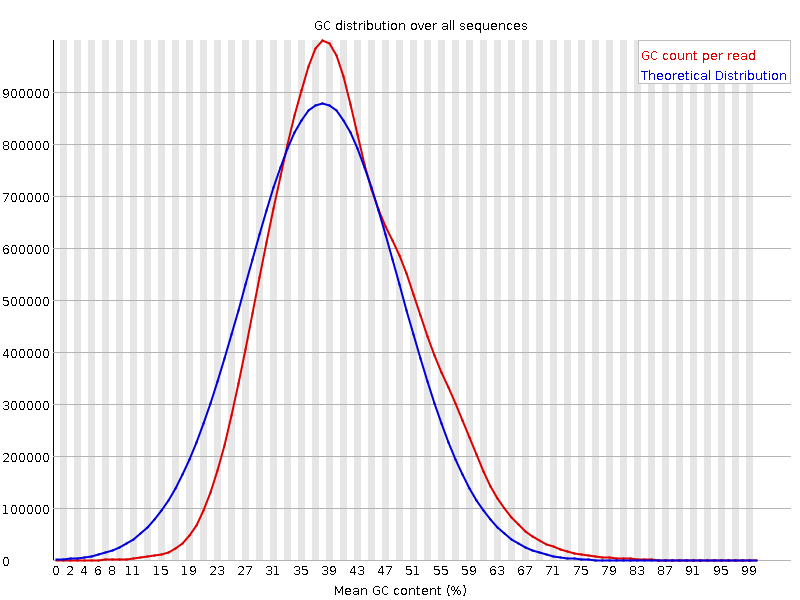

qc/SRR062634_1.filt_fastqc/Images/per_sequence_quality.png


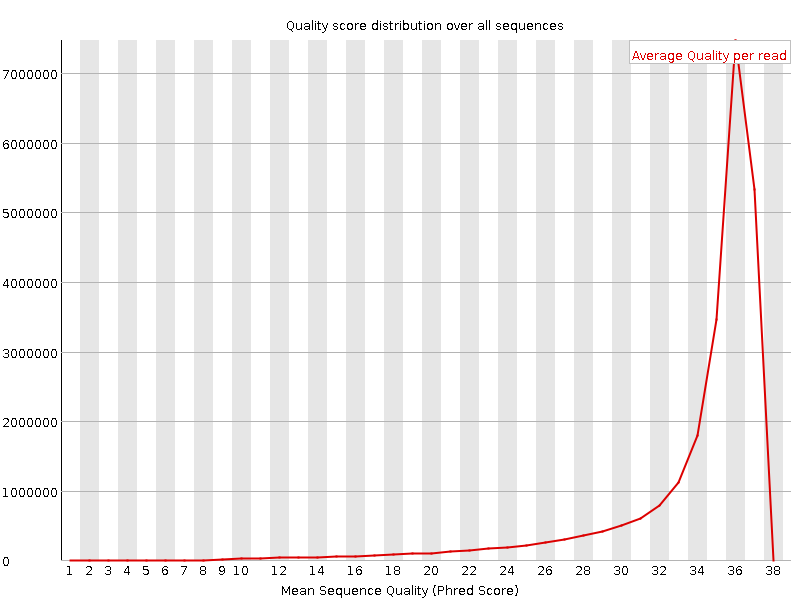

qc/SRR062634_1.filt_fastqc/Images/per_base_sequence_content.png


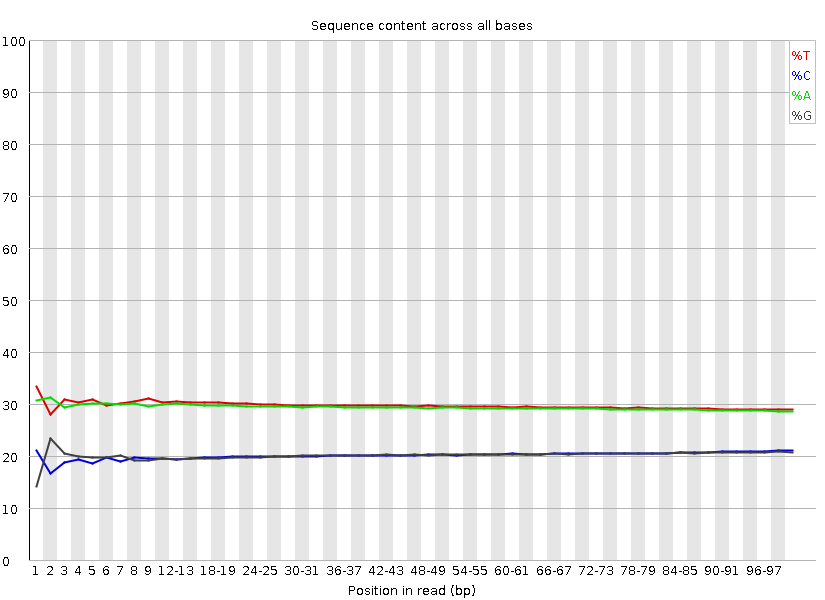

qc/SRR062634_1.filt_fastqc/Images/per_base_quality.png


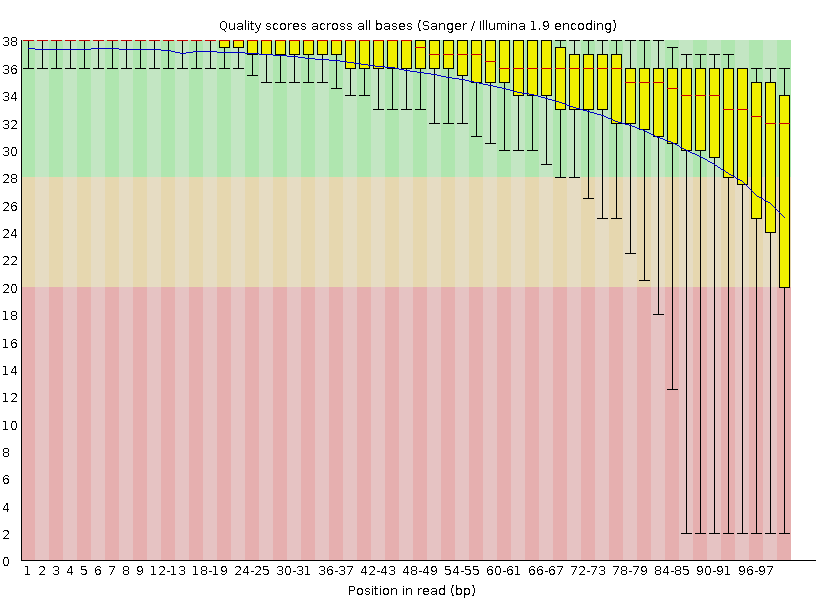

In [79]:
import os
from IPython.display import Image, display

for filename in os.scandir("qc/SRR062634_1.filt_fastqc/Images/"):
    if filename.is_file():
        print(filename.path)
        display(Image(filename.path))

In [81]:
!cat qc/SRR062634_2.filt_fastqc/summary.txt

PASS	Basic Statistics	SRR062634_2.filt.fastq.gz
PASS	Per base sequence quality	SRR062634_2.filt.fastq.gz
PASS	Per tile sequence quality	SRR062634_2.filt.fastq.gz
PASS	Per sequence quality scores	SRR062634_2.filt.fastq.gz
WARN	Per base sequence content	SRR062634_2.filt.fastq.gz
WARN	Per sequence GC content	SRR062634_2.filt.fastq.gz
PASS	Per base N content	SRR062634_2.filt.fastq.gz
PASS	Sequence Length Distribution	SRR062634_2.filt.fastq.gz
PASS	Sequence Duplication Levels	SRR062634_2.filt.fastq.gz
PASS	Overrepresented sequences	SRR062634_2.filt.fastq.gz
PASS	Adapter Content	SRR062634_2.filt.fastq.gz


qc/SRR062634_2.filt_fastqc/Images/sequence_length_distribution.png


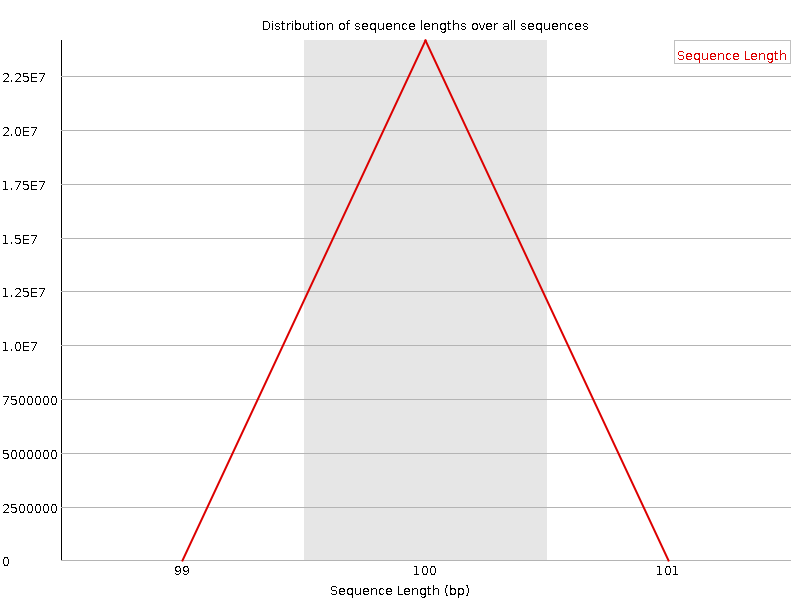

qc/SRR062634_2.filt_fastqc/Images/per_tile_quality.png


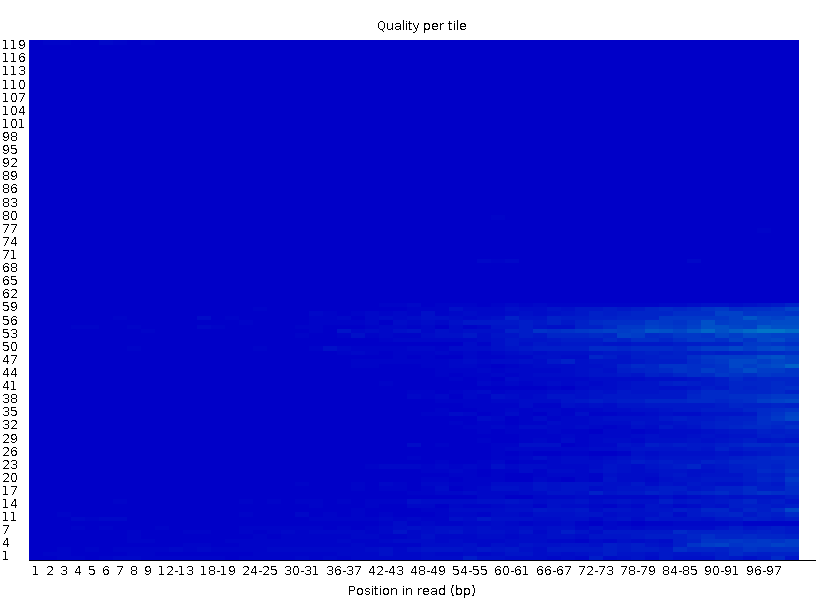

qc/SRR062634_2.filt_fastqc/Images/per_base_n_content.png


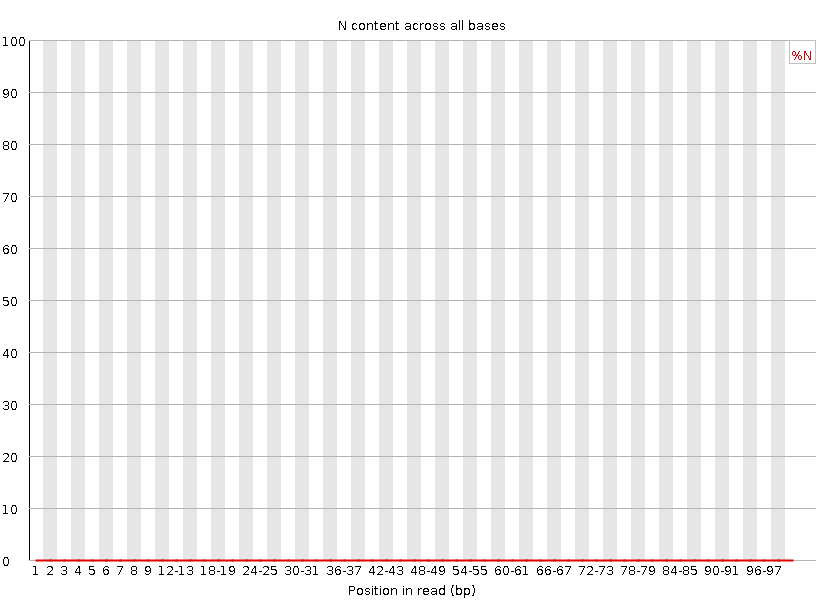

qc/SRR062634_2.filt_fastqc/Images/duplication_levels.png


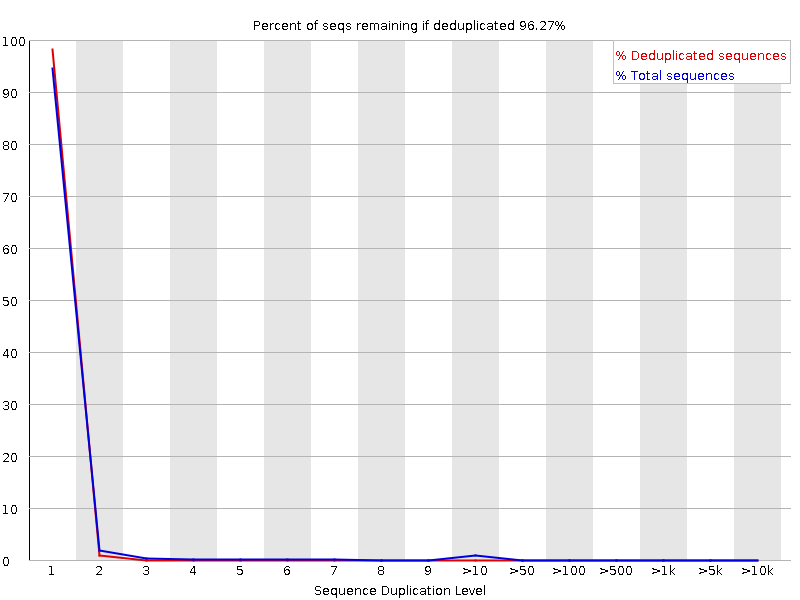

qc/SRR062634_2.filt_fastqc/Images/adapter_content.png


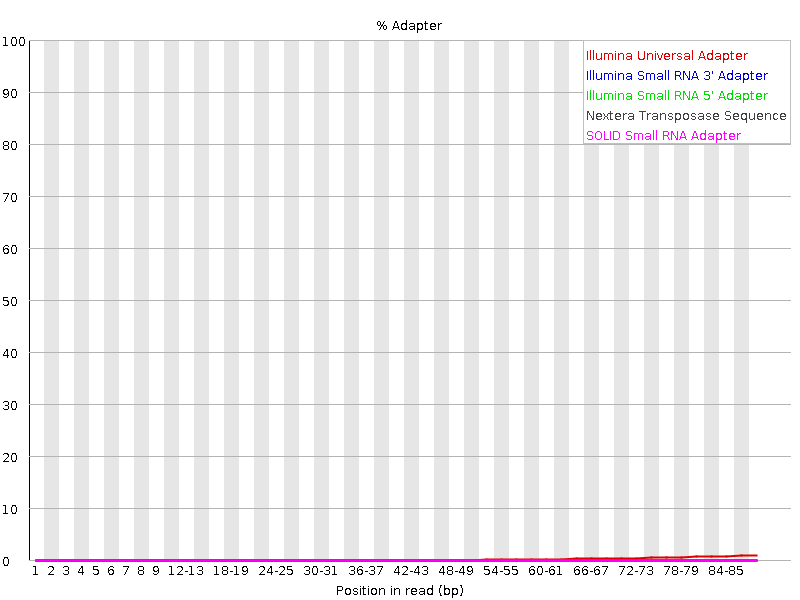

qc/SRR062634_2.filt_fastqc/Images/per_sequence_gc_content.png


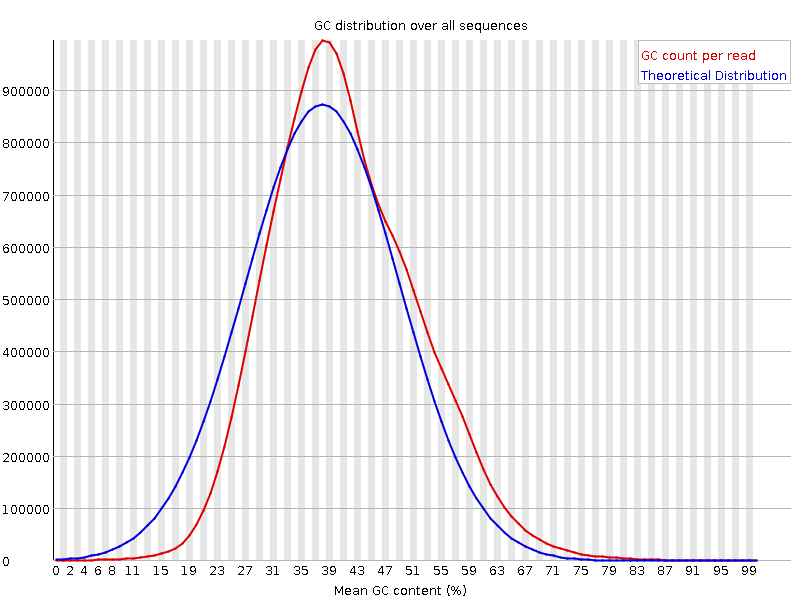

qc/SRR062634_2.filt_fastqc/Images/per_sequence_quality.png


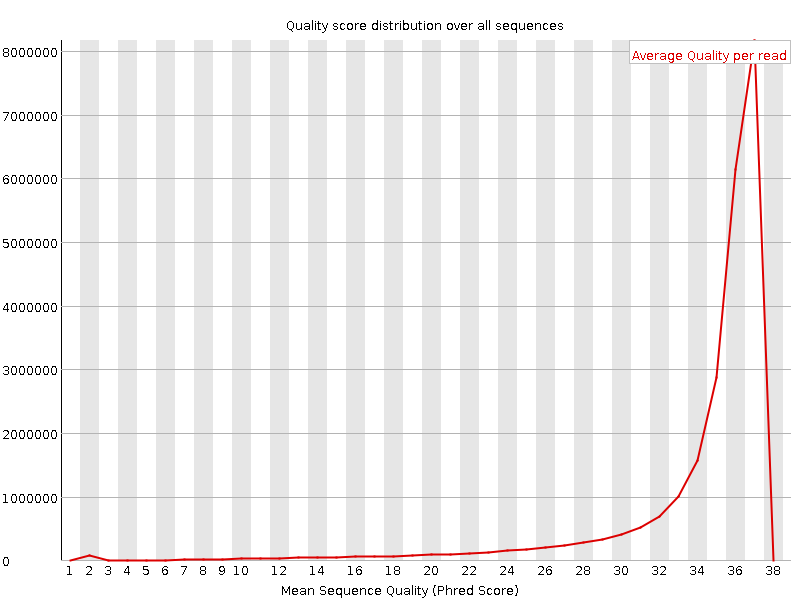

qc/SRR062634_2.filt_fastqc/Images/per_base_sequence_content.png


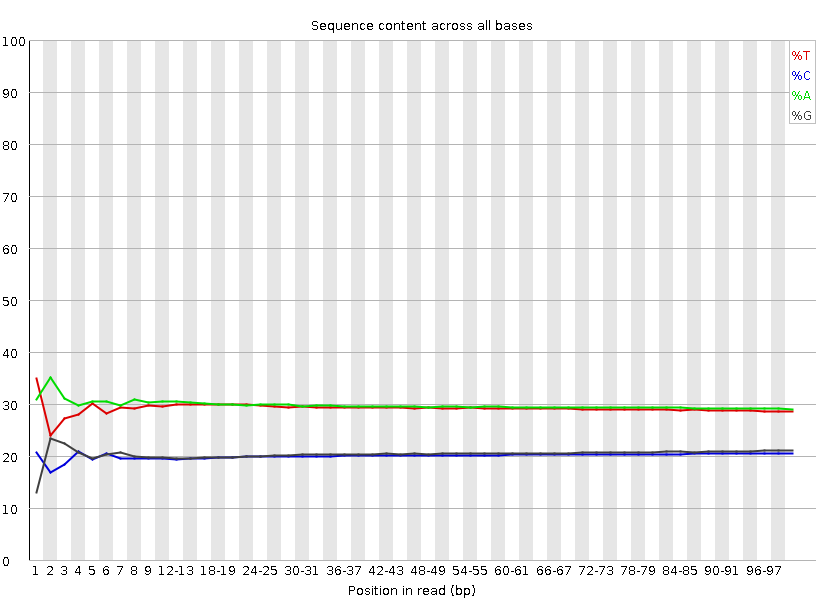

qc/SRR062634_2.filt_fastqc/Images/per_base_quality.png


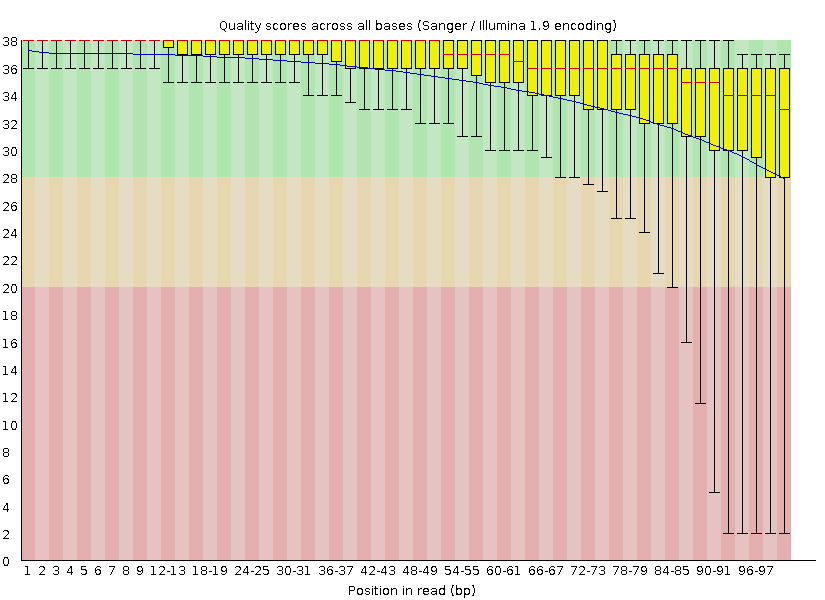

In [80]:
import os
from IPython.display import Image, display

for filename in os.scandir("qc/SRR062634_2.filt_fastqc/Images/"):
    if filename.is_file():
        print(filename.path)
        display(Image(filename.path))

In [ ]:
# No trimming required, quality looks okay.

### STEP 2: Map to reference using BWA-MEM


In [66]:
# BWA index reference 
!bwa index ref/hg38.fa

[bwa_index] Pack FASTA... 36.56 sec
[bwa_index] Construct BWT for the packed sequence...
[BWTIncCreate] textLength=6418572210, availableWord=463634060
[BWTIncConstructFromPacked] 10 iterations done. 99999986 characters processed.
[BWTIncConstructFromPacked] 20 iterations done. 199999986 characters processed.
[BWTIncConstructFromPacked] 30 iterations done. 299999986 characters processed.
[BWTIncConstructFromPacked] 40 iterations done. 399999986 characters processed.
[BWTIncConstructFromPacked] 50 iterations done. 499999986 characters processed.
[BWTIncConstructFromPacked] 60 iterations done. 599999986 characters processed.
[BWTIncConstructFromPacked] 70 iterations done. 699999986 characters processed.
[BWTIncConstructFromPacked] 80 iterations done. 799999986 characters processed.
[BWTIncConstructFromPacked] 90 iterations done. 899999986 characters processed.
[BWTIncConstructFromPacked] 100 iterations done. 999999986 characters processed.
[BWTIncConstructFromPacked] 110 iterations done. 

In [83]:
!ls ref/

hg38.dict  hg38.fa.amb	hg38.fa.bwt  hg38.fa.pac
hg38.fa    hg38.fa.ann	hg38.fa.fai  hg38.fa.sa


In [84]:
!mkdir aligned_reads

In [88]:
# BWA alignment

!bwa mem -t 4                                                   \
-R "@RG\tID:SRR062634\tPL:ILLUMINA\tSM:SRR062634"               \
ref/hg38.fa                                                     \
reads/SRR062634_1.filt.fastq.gz reads/SRR062634_2.filt.fastq.gz \
> aligned_reads/SRR062634.paired.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 400000 sequences (40000000 bp)...
[M::process] read 400000 sequences (40000000 bp)...
[M::mem_pestat] # candidate unique pairs for (FF, FR, RF, RR): (5, 161234, 29, 1)
[M::mem_pestat] skip orientation FF as there are not enough pairs
[M::mem_pestat] analyzing insert size distribution for orientation FR...
[M::mem_pestat] (25, 50, 75) percentile: (168, 181, 194)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (116, 246)
[M::mem_pestat] mean and std.dev: (180.52, 19.48)
[M::mem_pestat] low and high boundaries for proper pairs: (90, 272)
[M::mem_pestat] analyzing insert size distribution for orientation RF...
[M::mem_pestat] (25, 50, 75) percentile: (187, 201, 210)
[M::mem_pestat] low and high boundaries for computing mean and std.dev: (141, 256)
[M::mem_pestat] mean and std.dev: (198.08, 11.66)
[M::mem_pestat] low and high boundaries for proper pairs: (118, 279)
[M::mem_pestat] skip orientation RR as

In [89]:
!ls aligned_reads/

SRR062634.paired.sam


### STEP 3: Mark Duplicates and Sort - GATK4

In [90]:
!gatk MarkDuplicatesSpark                         \
-I aligned_reads/SRR062634.paired.sam             \
-O aligned_reads/SRR062634_sorted_dedup_reads.bam

ストリーミング出力は最後の 5000 行に切り捨てられました。
23/02/07 17:38:29 INFO Executor: Finished task 1089.0 in stage 11.0 (TID 9556). 1235 bytes result sent to driver
23/02/07 17:38:29 INFO TaskSetManager: Starting task 1091.0 in stage 11.0 (TID 9558, localhost, executor driver, partition 1091, PROCESS_LOCAL, 7662 bytes)
23/02/07 17:38:29 INFO Executor: Running task 1091.0 in stage 11.0 (TID 9558)
23/02/07 17:38:29 INFO TaskSetManager: Finished task 1089.0 in stage 11.0 (TID 9556) in 659 ms on localhost (executor driver) (1090/1505)
23/02/07 17:38:29 INFO ShuffleBlockFetcherIterator: Getting 1505 non-empty blocks including 1505 local blocks and 0 remote blocks
23/02/07 17:38:29 INFO ShuffleBlockFetcherIterator: Started 0 remote fetches in 10 ms
23/02/07 17:38:29 INFO FileOutputCommitter: File Output Committer Algorithm version is 2
23/02/07 17:38:29 INFO FileOutputCommitter: FileOutputCommitter skip cleanup _temporary folders under output directory:false, ignore cleanup failures: false
23/02/07 17:38:29 INF

In [91]:
!ls aligned_reads/

SRR062634.paired.sam		  SRR062634_sorted_dedup_reads.bam.bai
SRR062634_sorted_dedup_reads.bam  SRR062634_sorted_dedup_reads.bam.sbi


### STEP 4: Base quality recalibration

In [92]:
!mkdir data

In [93]:
# build the model

!gatk BaseRecalibrator                                  \
-I aligned_reads/SRR062634_sorted_dedup_reads.bam       \
-R ref/hg38.fa                                          \
--known-sites hg38/Homo_sapiens_assembly38.dbsnp138.vcf \
-O data/recal_data.table

Using GATK jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar BaseRecalibrator -I aligned_reads/SRR062634_sorted_dedup_reads.bam -R ref/hg38.fa --known-sites hg38/Homo_sapiens_assembly38.dbsnp138.vcf -O data/recal_data.table
17:42:05.414 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
17:42:05.819 INFO  BaseRecalibrator - ------------------------------------------------------------
17:42:05.820 INFO  BaseRecalibrator - The Genome Analysis Toolkit (GATK) v4.3.0.0
17:42:05.820 INFO  BaseRecalibrator - For support and documentation go to https://software.broadinstitute.org/gatk/
17:42:05.820 INFO  BaseRec

In [94]:
# Apply the model to adjust the base quality scores

!gatk ApplyBQSR                                        \
-I aligned_reads/SRR062634_sorted_dedup_reads.bam      \
-R ref/hg38.fa                                         \
--bqsr-recal-file data/recal_data.table                \
-O aligned_reads/SRR062634_sorted_dedup_bqsr_reads.bam 

Using GATK jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar ApplyBQSR -I aligned_reads/SRR062634_sorted_dedup_reads.bam -R ref/hg38.fa --bqsr-recal-file data/recal_data.table -O aligned_reads/SRR062634_sorted_dedup_bqsr_reads.bam
17:42:13.541 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
17:42:13.823 INFO  ApplyBQSR - ------------------------------------------------------------
17:42:13.824 INFO  ApplyBQSR - The Genome Analysis Toolkit (GATK) v4.3.0.0
17:42:13.824 INFO  ApplyBQSR - For support and documentation go to https://software.broadinstitute.org/gatk/
17:42:13.824 INFO  ApplyBQSR - Executing

In [95]:
!ls data/

In [96]:
!ls aligned_reads/

SRR062634.paired.sam		       SRR062634_sorted_dedup_reads.bam
SRR062634_sorted_dedup_bqsr_reads.bai  SRR062634_sorted_dedup_reads.bam.bai
SRR062634_sorted_dedup_bqsr_reads.bam  SRR062634_sorted_dedup_reads.bam.sbi


### STEP 5: Collect Alignment & Insert Size Metrics

In [97]:
!gatk CollectAlignmentSummaryMetrics                  \
R=ref/hg38.fa                                         \
I=aligned_reads/SRR062634_sorted_dedup_bqsr_reads.bam \
O=aligned_reads/alignment_metrics.txt

Using GATK jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar CollectAlignmentSummaryMetrics R=ref/hg38.fa I=aligned_reads/SRR062634_sorted_dedup_bqsr_reads.bam O=aligned_reads/alignment_metrics.txt
INFO	2023-02-07 17:42:19	CollectAlignmentSummaryMetrics	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** 
https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    CollectAlignmentSummaryMetrics -R ref/hg38.fa -I aligned_reads/SRR062634_sorted_dedup_bqsr_reads.bam -O aligned_reads/alignment_metrics.txt
**********


1

In [98]:
!gatk CollectInsertSizeMetrics                            \
INPUT=aligned_reads/SRR062634_sorted_dedup_bqsr_reads.bam \
OUTPUT=aligned_reads/insert_size_metrics.txt              \
HISTOGRAM_FILE=aligned_reads/insert_size_histogram.pdf

Using GATK jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar CollectInsertSizeMetrics INPUT=aligned_reads/SRR062634_sorted_dedup_bqsr_reads.bam OUTPUT=aligned_reads/insert_size_metrics.txt HISTOGRAM_FILE=aligned_reads/insert_size_histogram.pdf
INFO	2023-02-07 17:42:26	CollectInsertSizeMetrics	

********** NOTE: Picard's command line syntax is changing.
**********
********** For more information, please see:
********** 
https://github.com/broadinstitute/picard/wiki/Command-Line-Syntax-Transition-For-Users-(Pre-Transition)
**********
********** The command line looks like this in the new syntax:
**********
**********    CollectInsertSizeMetrics -INPUT aligned_reads/SRR062634_sorted_dedup_bqsr_reads.bam -OUTPUT aligned_reads/insert_s

In [99]:
!ls -l aligned_reads/

total 20955632
-rw-r--r-- 1 root root        1820 Feb  7 17:42 alignment_metrics.txt
-rw-r--r-- 1 root root 15776043149 Feb  7 16:44 SRR062634.paired.sam
-rw-r--r-- 1 root root        3656 Feb  7 17:42 SRR062634_sorted_dedup_bqsr_reads.bai
-rw-r--r-- 1 root root        8570 Feb  7 17:42 SRR062634_sorted_dedup_bqsr_reads.bam
-rw-r--r-- 1 root root  5674037986 Feb  7 17:41 SRR062634_sorted_dedup_reads.bam
-rw-r--r-- 1 root root     8345720 Feb  7 17:41 SRR062634_sorted_dedup_reads.bam.bai
-rw-r--r-- 1 root root      100572 Feb  7 17:41 SRR062634_sorted_dedup_reads.bam.sbi


### STEP 6: Call Variants - gatk haplotype caller

In [100]:
!mkdir results

In [101]:
!gatk HaplotypeCaller \
-R ref/hg38.fa \
-I aligned_reads/SRR062634_sorted_dedup_bqsr_reads.bam \
-O results/raw_variants.vcf

Using GATK jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar HaplotypeCaller -R ref/hg38.fa -I aligned_reads/SRR062634_sorted_dedup_bqsr_reads.bam -O results/raw_variants.vcf
17:43:32.214 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
17:43:32.760 INFO  HaplotypeCaller - ------------------------------------------------------------
17:43:32.761 INFO  HaplotypeCaller - The Genome Analysis Toolkit (GATK) v4.3.0.0
17:43:32.763 INFO  HaplotypeCaller - For support and documentation go to https://software.broadinstitute.org/gatk/
17:43:32.764 INFO  HaplotypeCaller - Executing as root@009087f83b58 on Linux v

In [102]:
# extract SNPs & INDELS

!gatk SelectVariants \
-R ref/hg38.fa \
-V results/raw_variants.vcf \
--select-type SNP \
-O results/raw_snps.vcf

Using GATK jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar SelectVariants -R ref/hg38.fa -V results/raw_variants.vcf --select-type SNP -O results/raw_snps.vcf
17:55:15.063 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
17:55:15.291 INFO  SelectVariants - ------------------------------------------------------------
17:55:15.292 INFO  SelectVariants - The Genome Analysis Toolkit (GATK) v4.3.0.0
17:55:15.292 INFO  SelectVariants - For support and documentation go to https://software.broadinstitute.org/gatk/
17:55:15.292 INFO  SelectVariants - Executing as root@009087f83b58 on Linux v5.10.147+ amd64
17

In [103]:
!gatk SelectVariants \
-R ref/hg38.fa \
-V results/raw_variants.vcf \
--select-type INDEL \
-O results/raw_indels.vcf

Using GATK jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar SelectVariants -R ref/hg38.fa -V results/raw_variants.vcf --select-type INDEL -O results/raw_indels.vcf
17:55:20.278 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/usr/local/share/gatk4-4.3.0.0-0/gatk-package-4.3.0.0-local.jar!/com/intel/gkl/native/libgkl_compression.so
17:55:20.539 INFO  SelectVariants - ------------------------------------------------------------
17:55:20.540 INFO  SelectVariants - The Genome Analysis Toolkit (GATK) v4.3.0.0
17:55:20.540 INFO  SelectVariants - For support and documentation go to https://software.broadinstitute.org/gatk/
17:55:20.540 INFO  SelectVariants - Executing as root@009087f83b58 on Linux v5.10.147+ amd6

In [104]:
!ls -l results

total 168
-rw-r--r-- 1 root root 41894 Feb  7 17:55 raw_indels.vcf
-rw-r--r-- 1 root root 14120 Feb  7 17:55 raw_indels.vcf.idx
-rw-r--r-- 1 root root 41890 Feb  7 17:55 raw_snps.vcf
-rw-r--r-- 1 root root 14118 Feb  7 17:55 raw_snps.vcf.idx
-rw-r--r-- 1 root root 32053 Feb  7 17:55 raw_variants.vcf
-rw-r--r-- 1 root root 14122 Feb  7 17:55 raw_variants.vcf.idx


In [115]:
!tree --du -h

.
├── [ 20G]  aligned_reads
│   ├── [1.8K]  alignment_metrics.txt
│   ├── [ 15G]  SRR062634.paired.sam
│   ├── [3.6K]  SRR062634_sorted_dedup_bqsr_reads.bai
│   ├── [8.4K]  SRR062634_sorted_dedup_bqsr_reads.bam
│   ├── [5.3G]  SRR062634_sorted_dedup_reads.bam
│   ├── [8.0M]  SRR062634_sorted_dedup_reads.bam.bai
│   └── [ 98K]  SRR062634_sorted_dedup_reads.bam.sbi
├── [4.0K]  data
├── [1.2M]  qc
│   ├── [590K]  SRR062634_1.filt_fastqc
│   │   ├── [197K]  fastqc_data.txt
│   │   ├── [2.9K]  fastqc.fo
│   │   ├── [233K]  fastqc_report.html
│   │   ├── [9.8K]  Icons
│   │   │   ├── [1.5K]  error.png
│   │   │   ├── [1.2K]  fastqc_icon.png
│   │   │   ├── [1.7K]  tick.png
│   │   │   └── [1.4K]  warning.png
│   │   ├── [142K]  Images
│   │   │   ├── [9.4K]  adapter_content.png
│   │   │   ├── [ 18K]  duplication_levels.png
│   │   │   ├── [7.7K]  per_base_n_content.png
│   │   │   ├── [ 10K]  per_base_quality.png
│   │   │   ├── [ 15K]  per_base_sequence_content.png
│   │   │   ├── [ 30K]  

Ref:
- Doc: https://gatk.broadinstitute.org/hc/en-us/categories/360002302312-Getting-Started
- Github: https://github.com/broadinstitute/gatk/releases
- Tutorial: https://gatk.broadinstitute.org/hc/en-us/articles/360041320571--How-to-Install-all-software-packages-required-to-follow-the-GATK-Best-Practices

- Best practise: https://gatk.broadinstitute.org/hc/en-us/articles/360035535932-Germline-short-variant-discovery-SNPs-Indels-